# Introduction to Linear Regression


## Overview

Linear Regression is a form of supervised machine learning. It is used to make predictions that are continuous values. Examples of continues values include:
- How many people will go see a movie on opening weekend?
- How much will a house sell for?
- How many likes will a social media post get? 

Linear regression is a commonly used machine learning model that is easy to understand and easy to use. 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.max_columns = None
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Simple Example: Study + Test Data

To get started, let's look at some data that includes test scores and study time

In [3]:
# Read data into a DataFrame

# from google.colab import drive    
# drive.mount('/content/gdrive')    

data = pd.read_csv('test_scores.csv', index_col=None)
data.head()

,student,minutes_studied,test_score
0,Ali,80,80
1,Athena,105,95
2,Geetika,70,77
3,Heather,15,69
4,Jamal,85,84


What about this makes this a supervised problem? Our data comes with targets that serve as the ground truth.

We can see that in this data, the sole feature is the minutes studies by each student, and the target is the test score out of 100. 

Even though this is a small dataset, it's good practice to check if any data is missing and to drop potential duplicate data.

In [4]:
# Be sure to remove duplicates in any data
data.drop_duplicates(inplace = True)

# Count the values in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 3 columns):
student            15 non-null object
minutes_studied    15 non-null int64
test_score         15 non-null int64
dtypes: int64(2), object(1)
memory usage: 480.0+ bytes


Looks like we don't have any missing values.

Let's summarize what's inside:

In [5]:
# Print high level summaries of what is in the dataset
data.describe()

,minutes_studied,test_score
count,15.00,15.00
mean,73.00,83.07
std,37.45,11.83
min,15.00,60.00
25%,47.50,77.00
50%,75.00,80.00
75%,97.50,94.00
max,130.00,100.00


With this data summary, we know: 
- The average study time was 73 minutes, the longest study time was 130 mins, and the shortest was 15 mins
- The average score is 83, the highest score was 100 and the lowest score was 60

### Visualizing the Data

(0, 110)

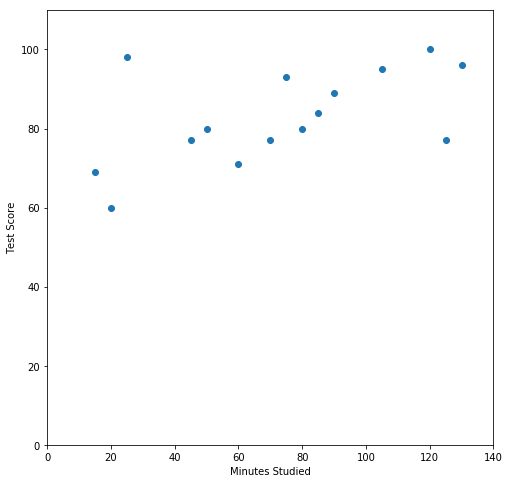

In [6]:
# Set size of plot
plt.figure(figsize=(8,8))
# Set X andY values to plot
plt.scatter(data["minutes_studied"],data["test_score"])
# Set axis labels
plt.xlabel("Minutes Studied")
plt.ylabel("Test Score")
# Set axis range
plt.xlim(0,140)
plt.ylim(0,110)

Here, we're plotting the minutes studied on the X axis and the test scores on the Y axis. Visualizing the data in a scatter plot allows us to interrograte it more: 
- Is there a relationship between time studied and test score? 

Our machine learning goal is learn from this data set and learn how to predict a test score by only knowing how long a student studied. 
- How can we use the data available to build a generalized model that would allow us to make any prediction possible? 
- Can we reverse engineer an equation that would allow us to input in minutes studied and output a test score? 

Let's say you're the teacher of this class and you want to boost your average score by 10 points. What would you propose? 

### What Linear Regression is Doing

Linear Regression is trying to fit the best line to your data, to create a model (aka a formula) that will allow you to input the minutes studied and output a predicted test score in this case. It takes the form:

y = ax + b

**y** is the target (test score)

**x** is our feature (time studied)

**a** is a coefficient for the feature

**b** is the y-axis intercept (where x=0)

The machine learning algorithm will quickly evaluate the best results for a and b that allow us to predict any test score from any input time. The algorithm will test many iterations and find the best one.  

### Sum of Squared Errors

Linear Regression is optimizing for the model that makes the least mistakes. It calculates this based on the Sum of  Squared Errors. 

The Sum of Squared Errors takes each predicted value based on a model, substracts the real observed value, squares it, and adds all of them together for the entire dataset. 

The model starts with a simple model and computes the Sum of Squared Errors. It then iteratively evaluates the next model in sequence and computes the Sum of Squared Errors. It continues to do so until it finds the model that has the lowest Sum of Squared Errors - that will be the best model. 

What does that look like? 

1. We could be lazy and just predict the average test score, 83.1, for each prediction, regardless of the time spent studying. This model would be the worst case scenario. When we sum the squared errors, we get 1958.8

<img src="Least_Squares.png">

Let's test rotating the line to better fit the model

<img src="Least_Squares4.png">

- Model #2 has a better Sum of Squared Errors 1640.6 than model #1
- Model #3 has a better SSE, 1469.8, than model #2
- Model #4 has a worse SSE, 2055.4

If we chart the Sum of Squared Errors for each successive model, we get:

<img src="SSE1.png" width="400">

We can see that Model 3 had the lowest Sum of Square Error. Of these four models, Model 3 is the best one. 

A machine learning Linear Regression algorithm will do this quicker, with more iterations, and with more precise results.

### How to use Linear Regression Model in sklearn

Separate your target into its own dataframe Y
Separate your target into its own dataframe X

In [7]:
Y = data[["test_score"]]
X = data[["minutes_studied"]]

Create a new instance of a Linear Regression Model

In [8]:
test_score_LR_model = LinearRegression()

Fit the model by inputing the X and Y values

In [9]:
test_score_LR_model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

The model has now fit the best line. We can extract the coefficient and intercept values

In [10]:
test_score_LR_model.intercept_

array([70.25449762])

In [11]:
test_score_LR_model.coef_

array([[0.17550916]])

What this means is our fitted line that generalizes our observed data is:
    
Test score = 0.17550916 * Minutes Studied + 70.25449762

### Plot Observed Data with Model Output

What does the fitted model look like? 

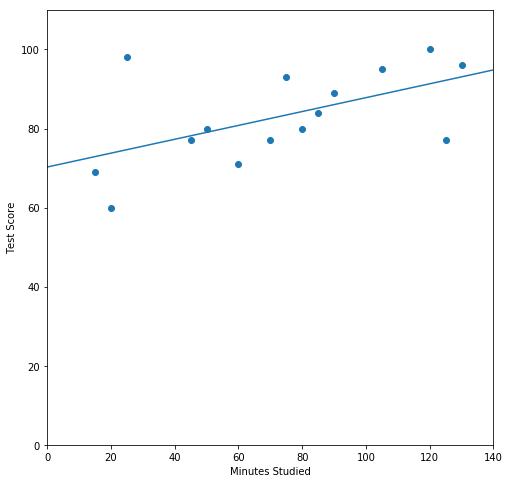

In [12]:
# Set size of plot
plt.figure(figsize=(8,8))

# Plot our model output
x_plot = np.linspace(0, 140) 
y_plot = 0.17550916 * x_plot + 70.25449762
plt.plot(x_plot, y_plot)

# Plot our Observed Data
plt.scatter(data["minutes_studied"],data["test_score"])
plt.xlabel("Minutes Studied")
plt.ylabel("Test Score")
plt.xlim(0,140)
plt.ylim(0,110);

With the trained model, we can predict new test scores by entering new values for minutes studied:

Here let's predict a test score from 105 mins of studying

In [13]:
test_score_LR_model.predict(105)

array([[88.68295995]])

### R-Squared
#### How Well Does the Model Fit the data? 

Q: How do we evaluate how well the fitted linear regression model fits the data? 

A: R-squared

R-squared a statistical concept that represents what percent of the variation in the depdendent variable (here, the target or test scores) can be explained by variation in the independent variable (aka the feature, here the minutes studied).

- An R-squared of 100% means the variations in the feature account for 100% of the variation in the target
- An R-squared of 50% means that variations in the feature account for 50% of the variation in the target
- An R-squared of 0% means that variations in the feature account for 0% of the variation in the target

If we chart the Sum of Squared Errors for each successive model, we get:

<img src="r2.png" width="700">

Link to Image Source & Further Reading: https://www.datasciencecentral.com/profiles/blogs/r-squared-in-one-picture

For the test scores and minutes studied, we can extract the R-squared from the model directly

In [14]:
test_score_LR_model.score(X , Y)

0.308831383567432

For our example, the model explains 30.8% of the variation in test scores through the time spent studying. This evaluates the model on the data we trained on. 

### Evaluating Machine Learning Models

However, to evaluate the success of the model itself, we have to score the model on data that it has never seen before. The success of the model to predict on new data is the only way to fairly evaluate a model. We want to avoid models that are only good at evaluating data it has already seen, our goal is to have models that do a good job of generalizing for new unseen data.

For Machine Learning to score models on unseen data, we need to hold out a portion of the data for a final step of scoring.

## A Complete Linear Regression Machine Learning Project

### Revisiting Spotify Data

This data is originally from: https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

Let's use this data to answer the question. If you are a musician and need help deciding how to create the next chart topping hit, what musical features should you highlight to improve the chances your song will be a popular hit?

In [15]:
# Read data into a DataFrame
song_data = pd.read_csv('data.csv', index_col=None)
song_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.99,['Carl Woitschach'],0.71,158648,0.20,0,6KbQ3uYMLKb5jDxLF7wYDD,0.56,10,0.15,-12.43,1,Singende Bataillone 1. Teil,0,1928,0.05,118.47,0.78,1928
1,0.99,"['Robert Schumann', 'Vladimir Horowitz']",0.38,282133,0.01,0,6KuQTIu1KoTTkLXKrwlLPV,0.90,8,0.08,-28.45,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.05,83.97,0.08,1928
2,0.60,['Seweryn Goszczyński'],0.75,104300,0.22,0,6L63VW0PibdM1HDSBoqnoM,0.00,5,0.12,-19.92,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.93,107.18,0.88,1928
3,0.99,['Francisco Canaro'],0.78,180760,0.13,0,6M94FkXd15sOAOQYRnWPN8,0.89,1,0.11,-14.73,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.09,108.00,0.72,1928
4,0.99,"['Frédéric Chopin', 'Vladimir Horowitz']",0.21,687733,0.20,0,6N6tiFZ9vLTSOIxkj8qKrd,0.91,11,0.10,-16.83,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.04,62.15,0.07,1928


In [16]:
# Be sure to remove duplicates in any data
song_data.drop_duplicates(inplace = True)

# Count the values in the dataset
song_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169909 entries, 0 to 169908
Data columns (total 19 columns):
acousticness        169909 non-null float64
artists             169909 non-null object
danceability        169909 non-null float64
duration_ms         169909 non-null int64
energy              169909 non-null float64
explicit            169909 non-null int64
id                  169909 non-null object
instrumentalness    169909 non-null float64
key                 169909 non-null int64
liveness            169909 non-null float64
loudness            169909 non-null float64
mode                169909 non-null int64
name                169909 non-null object
popularity          169909 non-null int64
release_date        169909 non-null object
speechiness         169909 non-null float64
tempo               169909 non-null float64
valence             169909 non-null float64
year                169909 non-null int64
dtypes: float64(9), int64(6), object(4)
memory usage: 25.9+ MB


In [17]:
# Print high level summaries of what is in the dataset
song_data.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.00,169909.00,169909.00,169909.00,169909.00,169909.00,169909.00,169909.00,169909.00,169909.00,169909.00,169909.00,169909.00,169909.00,169909.00
mean,0.49,0.54,231406.16,0.49,0.08,0.16,5.20,0.21,-11.37,0.71,31.56,0.09,116.95,0.53,1977.22
std,0.38,0.18,121321.92,0.27,0.28,0.31,3.52,0.18,5.67,0.45,21.58,0.15,30.73,0.26,25.59
min,0.00,0.00,5108.00,0.00,0.00,0.00,0.00,0.00,-60.00,0.00,0.00,0.00,0.00,0.00,1921.00
25%,0.09,0.42,171040.00,0.26,0.00,0.00,2.00,0.10,-14.47,0.00,12.00,0.03,93.52,0.32,1957.00
50%,0.49,0.55,208600.00,0.48,0.00,0.00,5.00,0.14,-10.47,1.00,33.00,0.04,114.78,0.54,1978.00
75%,0.89,0.67,262960.00,0.71,0.00,0.09,8.00,0.26,-7.12,1.00,48.00,0.08,135.71,0.75,1999.00
max,1.00,0.99,5403500.00,1.00,1.00,1.00,11.00,1.00,3.85,1.00,100.00,0.97,244.09,1.00,2020.00


In [18]:
song_data.corr()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
acousticness,1.00,-0.27,-0.08,-0.75,-0.25,0.34,-0.02,-0.02,-0.57,0.05,-0.59,-0.06,-0.20,-0.19,-0.62
danceability,-0.27,1.00,-0.13,0.22,0.24,-0.28,0.02,-0.11,0.29,-0.05,0.22,0.23,-0.00,0.56,0.20
duration_ms,-0.08,-0.13,1.00,0.04,-0.04,0.08,-0.00,0.03,-0.01,-0.05,0.06,-0.06,-0.03,-0.20,0.08
energy,-0.75,0.22,0.04,1.00,0.14,-0.29,0.03,0.13,0.78,-0.04,0.50,-0.05,0.25,0.35,0.53
explicit,-0.25,0.24,-0.04,0.14,1.00,-0.14,0.01,0.04,0.15,-0.08,0.21,0.41,0.01,-0.02,0.25
instrumentalness,0.34,-0.28,0.08,-0.29,-0.14,1.00,-0.01,-0.05,-0.42,-0.04,-0.30,-0.12,-0.11,-0.19,-0.29
key,-0.02,0.02,-0.00,0.03,0.01,-0.01,1.00,-0.00,0.02,-0.11,0.01,0.02,0.00,0.03,0.01
liveness,-0.02,-0.11,0.03,0.13,0.04,-0.05,-0.00,1.00,0.05,0.01,-0.08,0.15,0.01,-0.00,-0.06
loudness,-0.57,0.29,-0.01,0.78,0.15,-0.42,0.02,0.05,1.00,-0.01,0.47,-0.11,0.21,0.31,0.49
mode,0.05,-0.05,-0.05,-0.04,-0.08,-0.04,-0.11,0.01,-0.01,1.00,-0.03,-0.06,0.01,0.01,-0.03


We have 169,000 data points. It would be hard to discern patterns in plotting that many points, so in this case we can randomly sample a smaller set to plot and explore the data.

In [19]:
songs_lite = song_data.sample(n=500)

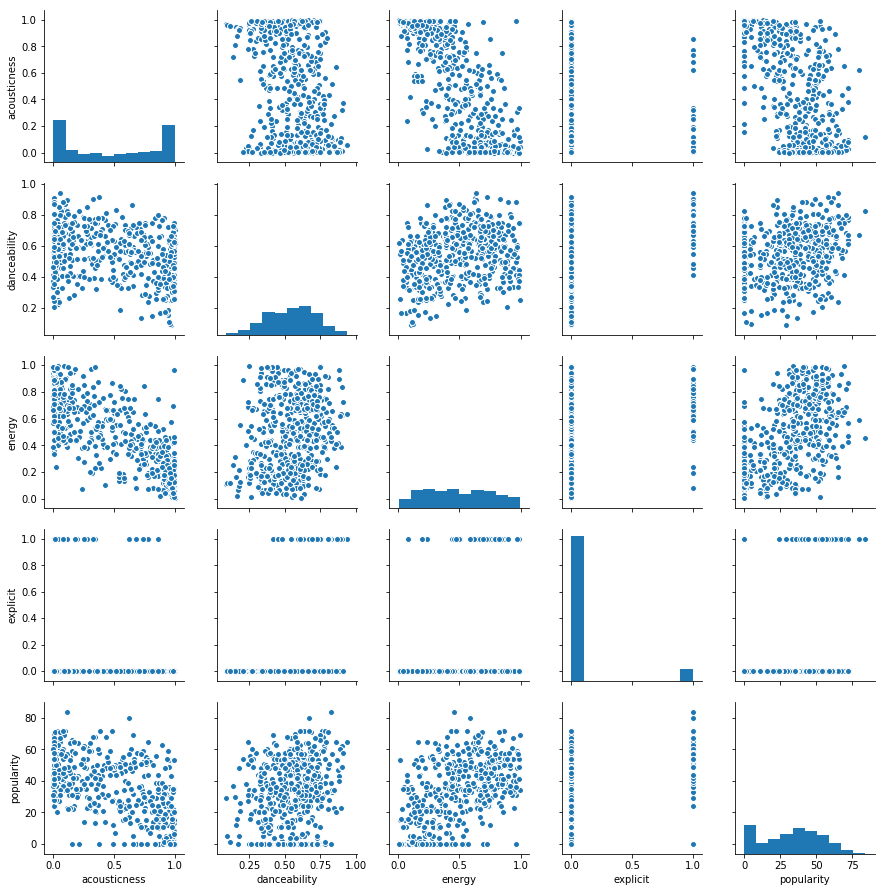

In [20]:
sns.pairplot(songs_lite[["acousticness","danceability","energy","explicit","popularity"]])

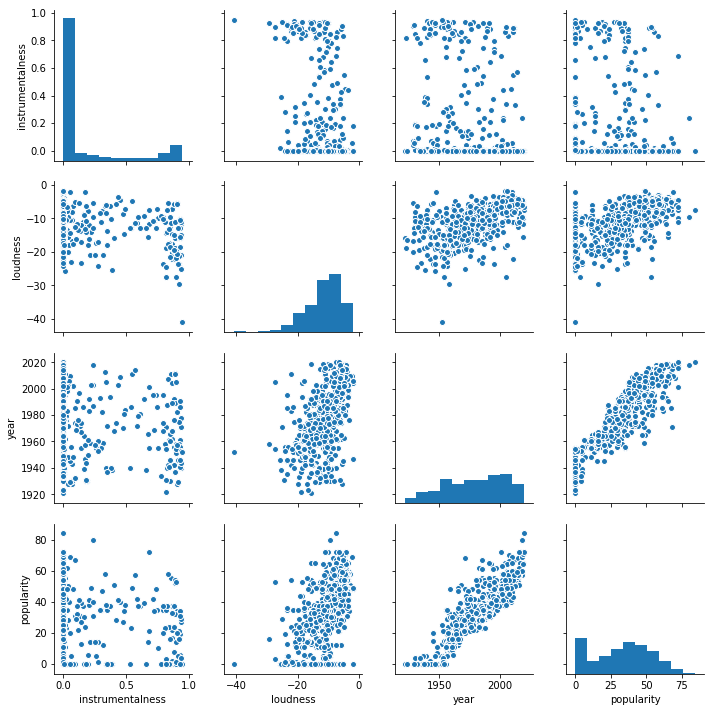

In [21]:
sns.pairplot(songs_lite[["instrumentalness","loudness","year","popularity"]])

#### Split Data into Test and Train Datasets

We will split the data into one set for training, and one set that we hold to the end to score the model's performance on data it has never seen (test set).

We'll include the features that had a stronger relationship as shown in the exploratory data analysis

In [22]:
X_songs = song_data[["acousticness","danceability","energy","explicit","instrumentalness","loudness","year"]]
y_songs = song_data[['popularity']]

In [23]:
#hold out 20% of the data for final testing
X_train, X_test, y_train, y_test = train_test_split(X_songs, y_songs, test_size=.20) # test_size variable sets the % of your split

In [24]:
print("Songs in Train set:", len(X_train))
print("Songs in Test set:", len(X_test))

Songs in Train set: 135927
Songs in Test set: 33982


#### Train the Model

In [25]:
song_linear_regression = LinearRegression()

song_linear_regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
song_linear_regression.score(X_train,y_train)

0.7811653407772167

The model has an R-Squared of 78.2%, which is pretty good. 

From the above correlation chart, we saw that the year a song is released had a very strong relationship to popularity. Newer songs are more popular. If we're a musician who wants to predict how well a song they are working on will perform based on its song features, we should train a model only on song features. 

#### Train the Model only on Song Features, and exclude Year

In [30]:
X_train_2 = X_train[["acousticness","danceability","energy","explicit","instrumentalness","loudness"]]

song_linear_regression_2 = LinearRegression()

song_linear_regression_2.fit(X_train_2,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
song_linear_regression_2.score( X_train_2,y_train)

0.3841292994895402

When we remove the year, the R-Squared drops to 38.4%, which is still not bad. 

#### Score the Model on the Test Set

In [32]:
X_test_2 = X_test[["acousticness","danceability","energy","explicit","instrumentalness","loudness"]]

song_linear_regression_2.score( X_test_2,y_test)

0.38915574968011446

Our final test R-squared score remains at 38.9% which means our model predicted equally well on test data it was not trained on. This is a good indicator that it will also perform well on future data that we dont know the popularity of.

#### Predict Using the Model

Let's say you're a musician with a new track and you're in the studio deciding how the song should come together. You could analyse the track along the features to predict how popular it may be on Spotify. 

Your track's features could be expressed as:

In [63]:
acousticness = 0.45
danceability = 0.50
energy = .75
explicit = 1
instrumentalness = 0.50
loudness = -25

In [64]:
song_linear_regression_2.predict([[acousticness, danceability, energy, explicit, instrumentalness, loudness]])

array([[25.31248784]])

Playround with the features, in particular loudness and acousticness to see how it impacts the popularity prediction. If you are a musician in a studio, what features would you highlight or minimize to create a chart-topping hit? 

#### Not Covered

The use of validation data sets when selecting between different potential models. 